In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data Mining Assignment/amazon_com.csv.zip')

In [26]:
df.head()

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Calvin Klein Women's Sheer Marquisette Demi Un...,$36.00,$32.40,https://www.amazon.com/-/dp/B01NAVD98J?th=1&psc=1,Calvin-Klein,Bras,Amazon US,"An unlined demi cup bra featuring sheer, sexy ...",4.5,47,"[ 72% Nylon, 28% Elastane , Imported , hook an...","30B , 30C , 30D , 30DD , 32A , 32B , 32C , 32D...","30B , 30C , 30D , 30DD , 32B , 32C , 32D , 32D...",Bare
1,Wacoal Embrace Lace Bikini Panty,$27.00,$27.00,https://www.amazon.com/-/dp/B0011YQFNK?th=1&psc=1,Wacoal,Panties,Amazon US,Embrace lace bikini offers great fit and match...,4.4,91,"[ 100% Nylon , Imported , Hand Wash , 1.2"" hig...","Small , Medium , Large , X-Large","Small , Medium , X-Large",Large
2,Wacoal Women's Slimline Seamless Minimizer Bra,$65.00,$65.00,https://www.amazon.com/-/dp/B000T3606Q?th=1&psc=1,Wacoal,Bras,Amazon US,Seamless underwire minimizer bra gives great s...,4.3,298,"[ Cups: 100% Polyester; Back: 71% Nylon, 29% S...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...",Black
3,Hanky Panky Womens Signature Lace Retro V-Kini,$36.00,$36.00,https://www.amazon.com/-/dp/B003Y6AX0Y?th=1&psc=1,Hanky-Panky,Panties,Amazon US,All-day comfort describes this figure-flatteri...,4.4,46,"[ Made in USA , All-day comfort describes this...","Small , Medium , Large , X-Large","Small , Medium , X-Large",Large
4,Wacoal Women's Red Carpet Strapless Bra,$65.00,$65.00,https://www.amazon.com/-/dp/B01CEBGQA0?th=1&psc=1,Wacoal,Bras,Amazon US,"Red Carpet full figure strapless fits great, s...",4.4,747,"[ 91% Nylon, 9% Spandex , Imported , hook and ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...",Pecan


In [27]:
df = df[['product_name','description']]
df.head()

,product_name,description
0,Calvin Klein Women's Sheer Marquisette Demi Un...,"An unlined demi cup bra featuring sheer, sexy ..."
1,Wacoal Embrace Lace Bikini Panty,Embrace lace bikini offers great fit and match...
2,Wacoal Women's Slimline Seamless Minimizer Bra,Seamless underwire minimizer bra gives great s...
3,Hanky Panky Womens Signature Lace Retro V-Kini,All-day comfort describes this figure-flatteri...
4,Wacoal Women's Red Carpet Strapless Bra,"Red Carpet full figure strapless fits great, s..."


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31612 entries, 0 to 31611
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  31612 non-null  object
 1   description   31612 non-null  object
dtypes: object(2)
memory usage: 494.1+ KB


In [29]:
df.isnull().sum()

product_name    0
description     0
dtype: int64

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [31]:
from sklearn.cluster import KMeans


In [32]:
documents = df['description'].values.astype("U")

In [33]:
vectorizer = TfidfVectorizer(stop_words='english')


In [34]:
features = vectorizer.fit_transform(documents)


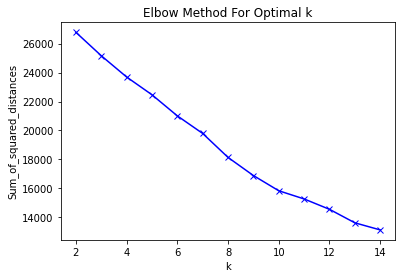

In [35]:
import matplotlib.pyplot as plt
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(features)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [36]:
k = 7
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=7, n_init=1)

In [37]:
df['cluster'] = model.labels_

In [38]:
df.head()

,product_name,description,cluster
0,Calvin Klein Women's Sheer Marquisette Demi Un...,"An unlined demi cup bra featuring sheer, sexy ...",5
1,Wacoal Embrace Lace Bikini Panty,Embrace lace bikini offers great fit and match...,3
2,Wacoal Women's Slimline Seamless Minimizer Bra,Seamless underwire minimizer bra gives great s...,6
3,Hanky Panky Womens Signature Lace Retro V-Kini,All-day comfort describes this figure-flatteri...,3
4,Wacoal Women's Red Carpet Strapless Bra,"Red Carpet full figure strapless fits great, s...",4


In [39]:
# output the result to a text file.

clusters = df.groupby('cluster')    

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['product_name','description']] # get title and overview columns
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()

In [41]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :7]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 seamless
 spacer
 molded
 support
 cups
 sling
 contour
------------
Cluster 1:
 beautiful
 plunge
 chantilly
 low
 lace
 bra
 superior
------------
Cluster 2:
 corded
 overlay
 dramatic
 scallop
 neckline
 balconette
 features
------------
Cluster 3:
 lace
 embrace
 wire
 fashion
 bikini
 kiss
 fit
------------
Cluster 4:
 carpet
 fits
 stays
 red
 supportive
 strapless
 place
------------
Cluster 5:
 klein
 calvin
 modern
 sleek
 cotton
 logo
 waistband
------------
Cluster 6:
 bra
 shirt
 sport
 comfort
 offers
 cups
 features
------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
df.groupby('cluster').head()

,product_name,description,cluster
0,Calvin Klein Women's Sheer Marquisette Demi Un...,"An unlined demi cup bra featuring sheer, sexy ...",5
1,Wacoal Embrace Lace Bikini Panty,Embrace lace bikini offers great fit and match...,3
2,Wacoal Women's Slimline Seamless Minimizer Bra,Seamless underwire minimizer bra gives great s...,6
3,Hanky Panky Womens Signature Lace Retro V-Kini,All-day comfort describes this figure-flatteri...,3
4,Wacoal Women's Red Carpet Strapless Bra,"Red Carpet full figure strapless fits great, s...",4
5,Wacoal Womens Basic Beauty Contour T-Shirt Bra,Basic beauty contour spacer will offer great s...,0
6,Calvin Klein Women's Seductive Comfort Tailore...,Calvin Klein Black is an updated version of CK...,5
7,Calvin Klein Women's Modern Cotton Bikini,Soft jersey Calvin Klein Underwear briefs with...,5
8,Calvin Klein Women's Modern Cotton Bikini,Soft jersey Calvin Klein Underwear briefs with...,5
9,Wacoal Womens Basic Beauty Contour T-Shirt Bra,Basic beauty contour spacer will offer great s...,0


In [52]:
df.to_csv('clustered_description.csv')

In [53]:
from google.colab import files

files.download('clustered_description.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>